Code to plot the behavior of individual participants, grouped by moral strategy

In [1]:
import warnings, os, sys, matplotlib, scipy
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
matplotlib.rcParams['pdf.fonttype'] = 42 #To make text readable by Illustrator
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.cluster.hierarchy import dendrogram, linkage

sys.path.append('/project/3014018.02/analysis_mri/'+
                'DataSharingCollection/Code/1.Behavior-FitModels/Functions/')
import choiceModels, costFunctions, penalizedModelFit

base_dir = '/project/3014018.02/analysis_mri/DataSharingCollection/'

## Load fitted parameters and clusters

In [2]:
fittedParams = pd.read_csv(os.path.join(base_dir,
    'Results/2.Behavior-ClusterModel/ParticipantClustering.csv'),index_col=0)
print fittedParams['ClustName'].value_counts()
fittedParams.head()

IA    24
MO    21
GR     7
GA     5
Name: ClustName, dtype: int64


,sub,model,theta,phi,SSE,AIC,BIC,Sample,clust,ClustName
0,124,MP_ppSOE,0.340718,0.055082,65.0,-7.882301,-3.220835,old,1,GR
1,126,MP_ppSOE,0.078473,0.000799,205.0,79.413025,84.074491,old,4,MO
2,128,MP_ppSOE,0.030199,0.059205,255.0,96.000296,100.661762,old,3,IA
3,129,MP_ppSOE,0.206195,-0.095803,203.0,78.667921,83.329387,old,4,MO
4,130,MP_ppSOE,0.078536,-0.017041,323.0,113.965843,118.627309,old,4,MO


## Function definition

In [3]:
def plot_sub_ax(subDat,subNum,theta,phi,ax,plotLines=True):
    markers = ['^','o','v']
    handles = list()
    for multInd,mult in enumerate([6,4,2]):
        x_dat = subDat.loc[subDat['Multiplier']==mult,'Investment']
        y_dat = subDat.loc[subDat['Multiplier']==mult,'Returned']
        handle = ax.scatter(x_dat,y_dat,c='k',marker=markers[multInd],
                            s=50,alpha=.6)
        handles.append(handle)
        if plotLines:
            lm = scipy.stats.linregress(x_dat,y_dat)
            ax.plot([0,10],[lm.intercept,lm.intercept+10*lm.slope],'k:')
    ax.set_ylim([-1,31])
    ax.set_xticks(np.arange(0,11,2))
    ax.set_yticks(np.arange(0,31,5))
    ax.legend(handles,['x6','x4','x2'],loc=2,frameon=False)
    ax.set_xlabel('Investment')
    ax.set_ylabel('Returned')
    ax.set_title('s%i (%.2f, %.2f)'%(subNum,theta,phi))

## Plot participant behavior sorted by sub nr (supp fig 2)

In [4]:
allDataLong = pd.read_csv(os.path.join(base_dir,'Data/1.TaskBehavior/allDataLong.csv'),header=None,index_col=None)
allDataLong.columns=['sub','Investment','Multiplier','Returned','exp','fair','soc1','soc2']
ncols = 6
sns.set_context('notebook')
markers = {2: "v", 4: 'd', 6:'^'}

subNums = np.unique(fittedParams['sub'])
nsubs = len(subNums)
nrows = int(np.ceil(float(nsubs)/float(ncols)))
nrows

10

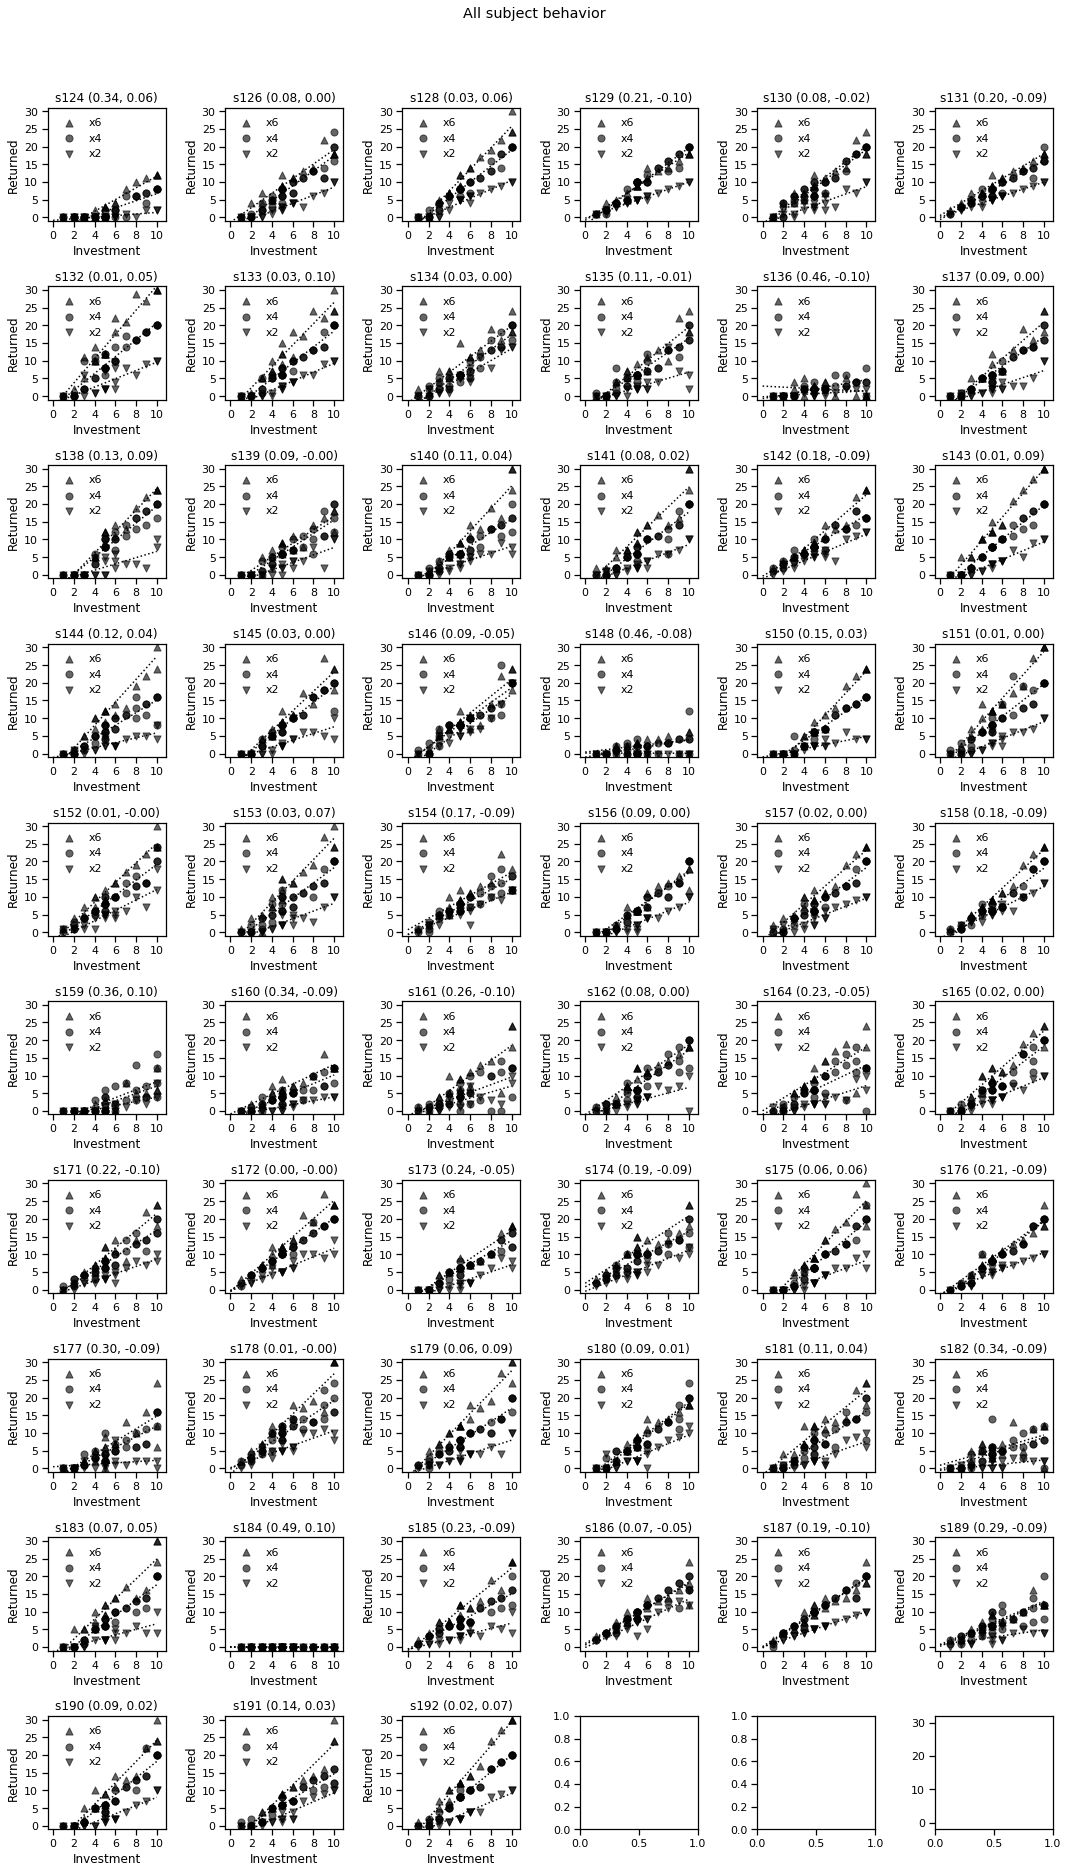

In [18]:
fig,ax = plt.subplots(nrows,ncols,figsize=[ncols*2.5,nrows*2.5],sharey=False)
for subInd,sub in enumerate(subNums):
    col = np.mod(subInd,ncols)
    row = int(np.floor(subInd/ncols))
    axCur = ax[row,col]
    subDat = allDataLong.loc[allDataLong['sub']==sub,:].copy()
    subDat = subDat.loc[subDat['Investment']>0,:]
    theta = fittedParams.loc[fittedParams['sub']==sub,'theta']
    phi = fittedParams.loc[fittedParams['sub']==sub,'phi']
    plot_sub_ax(subDat,sub,theta,phi,axCur)
plt.ylim([-2,32])
plt.tight_layout()
plt.suptitle('All subject behavior',y=1.02)
plt.savefig(os.path.join(base_dir,'Results/2.Behavior-ClusterModel/ClusterBehavior/AllSubjectBehavior.pdf'),
            transparent=True,bbox_inches='tight')
plt.show()

## Plot participant behavior per cluster (supp fig 5)

Cluster GR: subjects [124 136 148 159 160 182 184]


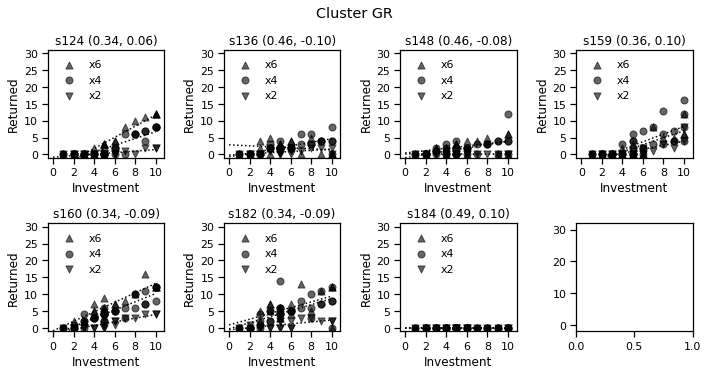

Cluster GA: subjects [142 146 154 158 186]


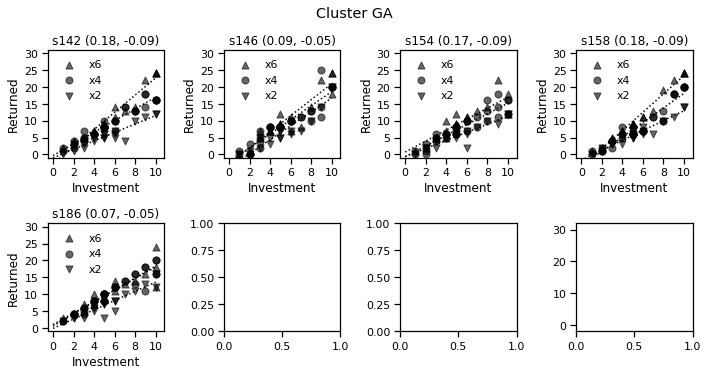

Cluster IA: subjects [128 132 133 138 140 141 143 144 145 150 151 152 153 157 165 172 175 178
 179 181 183 190 191 192]


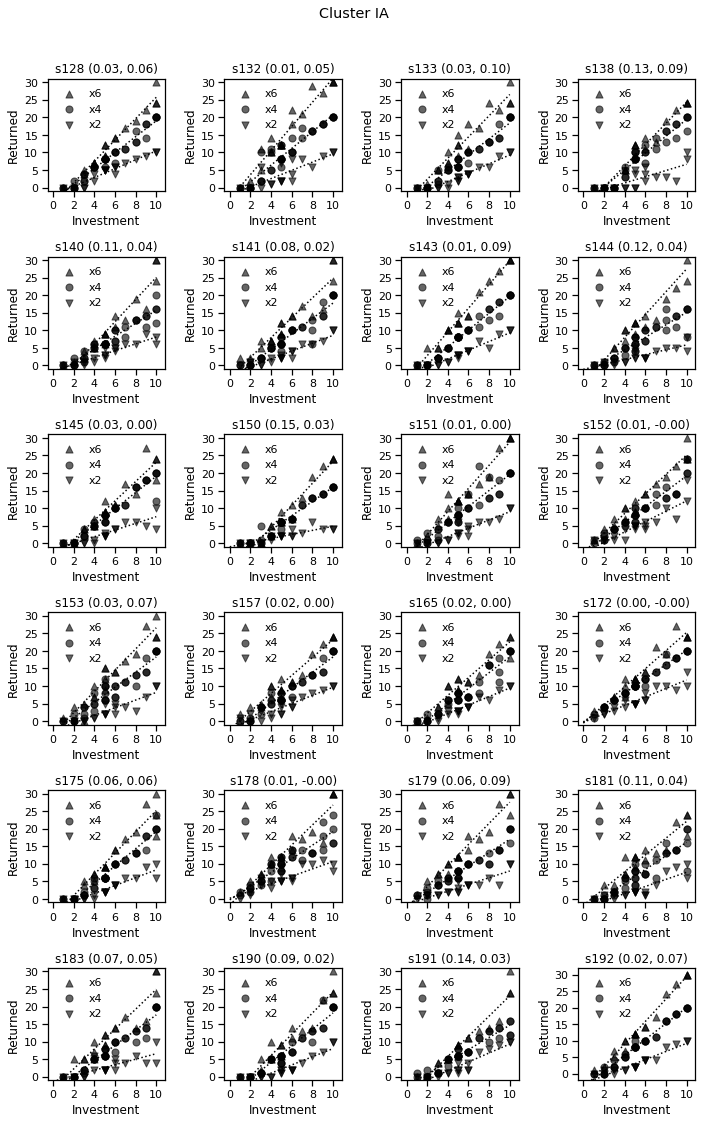

Cluster MO: subjects [126 129 130 131 134 135 137 139 156 161 162 164 171 173 174 176 177 180
 185 187 189]


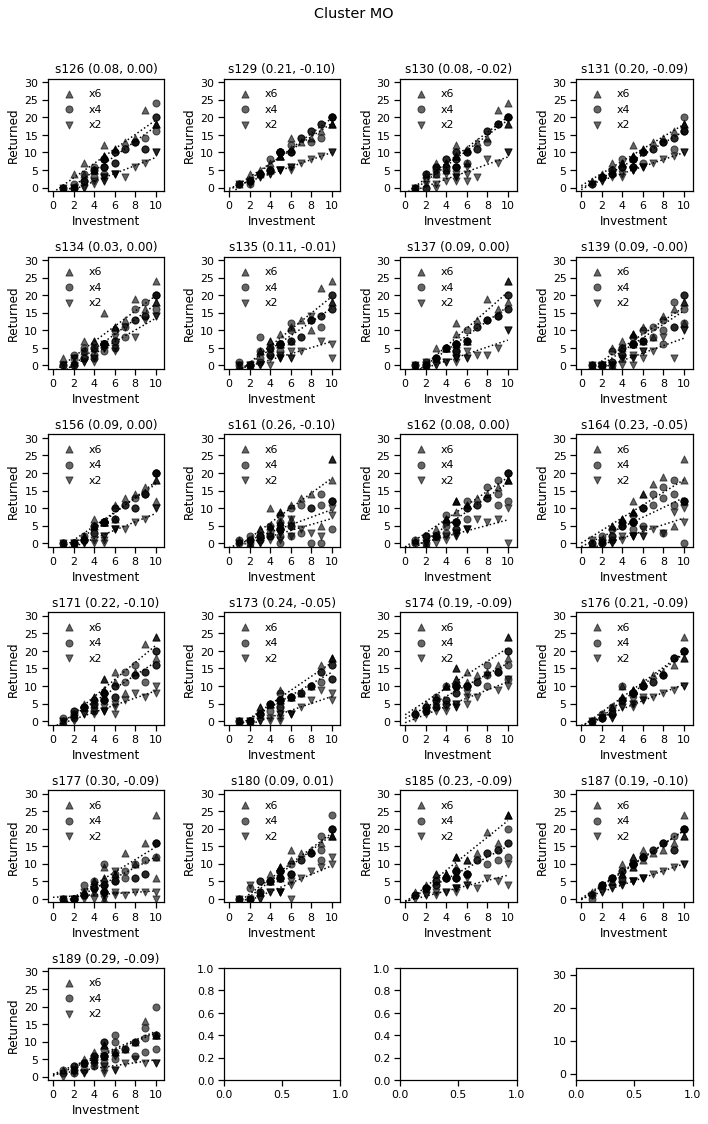

In [6]:
allDataLong = pd.read_csv(os.path.join(base_dir,'Data/1.TaskBehavior/allDataLong.csv'),header=None,index_col=None)
allDataLong.columns=['sub','Investment','Multiplier','Returned','exp','fair','soc1','soc2']
ncols = 4
sns.set_context('notebook')
markers = {2: "v", 4: 'd', 6:'^'}

for clustName in ['GR','GA','IA','MO']:
    clustSubs = np.array(fittedParams.loc[fittedParams['ClustName']==clustName,'sub'])
    print 'Cluster %s: subjects %s'%(clustName,clustSubs)
    nrows = int(np.ceil(float(len(clustSubs)/float(ncols))))
    fig,ax = plt.subplots(nrows,ncols,figsize=[ncols*2.5,nrows*2.5],sharey=False)
    for subInd,sub in enumerate(clustSubs):
        col = np.mod(subInd,ncols)
        if nrows == 1:
            axCur = ax[col]
        else:
            row = int(np.floor(subInd/ncols))
            axCur = ax[row,col]
        subDat = allDataLong.loc[allDataLong['sub']==sub,:].copy()
        subDat = subDat.loc[subDat['Investment']>0,:]
        theta = fittedParams.loc[fittedParams['sub']==sub,'theta']
        phi = fittedParams.loc[fittedParams['sub']==sub,'phi']
        plot_sub_ax(subDat,sub,theta,phi,axCur)
    plt.ylim([-2,32])
    plt.tight_layout()
    plt.suptitle('Cluster %s'%clustName,y=1.04)
    plt.savefig(os.path.join(base_dir,'Results/2.Behavior-ClusterModel/ClusterBehavior/Cluster-%s.pdf' %(
        clustName)),transparent=True,bbox_inches='tight')
    plt.show()

## Plot mean cluster behavior (fig. 4B)

In [7]:
allDataLong = pd.read_csv(os.path.join(base_dir,'Data/1.TaskBehavior/allDataLong.csv'),
                          header=None,index_col=None)
allDataLong.columns=['sub','Investment','Multiplier','Returned','exp','fair','soc1','soc2']
fittedParams = pd.read_csv(os.path.join(base_dir,
                            'Results/2.Behavior-ClusterModel/ParticipantClustering.csv'),index_col=0)
sns.set_context('notebook')

In [48]:
def plot_mean_clust_ax(meanClustDat,clustName,ax):
    markers = ['^','o','v'];
    handles = list();
    for multInd,mult in enumerate([6,4,2]):
        x_dat = meanClustDat.loc[meanClustDat['Multiplier']==mult,'Investment'];
        y_dat = meanClustDat.loc[meanClustDat['Multiplier']==mult,'Returned'];
        handle = ax.scatter(x_dat,y_dat,c='k',marker=markers[multInd],
                            s=50,alpha=.6);
        handles.append(handle);
        lm = scipy.stats.linregress(x_dat,y_dat);
        ax.plot([0,10],[lm.intercept,lm.intercept+10*lm.slope],'k:');
    ax.set_ylim([-1,31]);
    ax.set_xticks(np.arange(0,11,2));
    ax.set_yticks(np.arange(0,31,5));
    ax.legend(handles,['x6','x4','x2'],loc=2,frameon=False);
    ax.set_xlabel('Investment');
    ax.set_ylabel('Returned');
    ax.set_title('%s subjects'%clustName);
    return ''

Cluster IA: subjects [128 132 133 138 140 141 143 144 145 150 151 152 153 157 165 172 175 178
 179 181 183 190 191 192]
Cluster GA: subjects [142 146 154 158 186]
Cluster MO: subjects [126 129 130 131 134 135 137 139 156 161 162 164 171 173 174 176 177 180
 185 187 189]
Cluster GR: subjects [124 136 148 159 160 182 184]


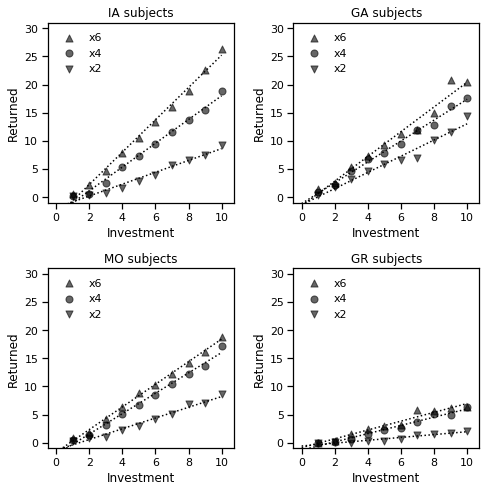

In [54]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
fig,ax = plt.subplots(2,2,figsize=[7,7])
order = [[0,0],[0,1],[1,0],[1,1]]
for clustInd,clustName in enumerate(['IA','GA','MO','GR']):
    clustSubs = np.array(fittedParams.loc[fittedParams['ClustName']==clustName,'sub'])
    print 'Cluster %s: subjects %s'%(clustName,clustSubs)
    clustDat = allDataLong.loc[allDataLong['sub'].isin(clustSubs),:].copy();
    meanClustDat = clustDat[['Investment','Multiplier','Returned']].groupby(
        ['Investment','Multiplier']).mean().reset_index();
    meanClustDat = meanClustDat.query('Investment > 0').reset_index(drop=True);
    axCur = ax[order[clustInd][0],order[clustInd][1]];
    plot_mean_clust_ax(meanClustDat,clustName,axCur);
plt.tight_layout()
plt.savefig(os.path.join(base_dir,'Results/2.Behavior-ClusterModel/ClusterBehavior/Means.pdf'),
            transparent=True,bbox_inches='tight')

#### Test for behavioral differences in x4 between GA, IA, MO

In [60]:
compareDat = allDataLong.merge(fittedParams[['sub','ClustName']],on='sub')
compareDat = compareDat.loc[(compareDat['Multiplier']==4) & (compareDat['Investment']>0),
               ['sub','Investment','Multiplier','Returned','ClustName']]
compareDat['Share'] = np.divide(compareDat['Returned'].astype(float),
                                compareDat['Investment'].astype(float)*4)
compareDat['earn'] = compareDat['Investment']*4 - compareDat['Returned']
compareDat.head()

,sub,Investment,Multiplier,Returned,ClustName,Share,earn
1,124,7,4,0,GR,0.000000,28
2,124,10,4,8,GR,0.200000,32
5,124,9,4,4,GR,0.111111,32
7,124,6,4,0,GR,0.000000,24
8,124,3,4,0,GR,0.000000,12


In [62]:
compareDat2 = compareDat[['sub','Share','earn','ClustName']].groupby(['sub','ClustName']).mean().reset_index()
compareDat2.head()

,sub,ClustName,Share,earn
0,124,GR,0.063863,19.631579
1,126,MO,0.296499,14.026316
2,128,IA,0.338915,13.078947
3,129,MO,0.412920,11.973684
4,130,MO,0.386082,12.473684


In [65]:
groupNames = ['GA','IA','MO']
groupData = [np.array(compareDat2.loc[compareDat2['ClustName']==gr,'earn']).flatten()
             for gr in groupNames]

In [66]:
scipy.stats.f_oneway(groupData[0],groupData[1],groupData[2])

F_onewayResult(statistic=2.505618017239408, pvalue=0.09247323559709301)

#### Plot investment distributions (supp fig 10)

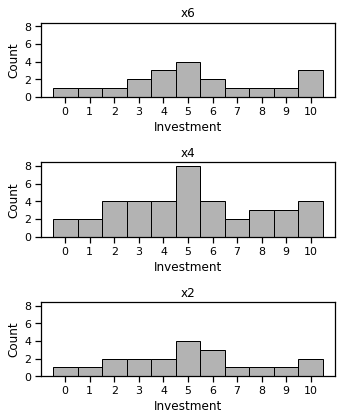

In [75]:
# (this doesn't necessarily belong in this notebook, but there's no good place for it)
subDat = allDataLong.loc[allDataLong['sub']==124].copy().reset_index(drop=True)
fig,ax = plt.subplots(nrows=3,figsize=[5,6],sharex=False,sharey=True)
xs = np.arange(0,11,1)
bins = xs-.5
bins = np.append(bins,10.5)
xs_locs = xs-.5
for multInd,mult in enumerate([6,4,2]):
    dat = subDat.loc[subDat['Multiplier']==mult,'Investment'].values
    ax[multInd].hist(dat,bins,color=[.7,.7,.7],edgecolor='k')
    ax[multInd].set_xlabel('Investment')
    ax[multInd].set_xticks(xs)
    ax[multInd].set_xticklabels(xs)
    ax[multInd].set_xlim(np.min(xs)-1,max(xs)+1)
    ax[multInd].set_yticks(np.arange(0,9,2))
    ax[multInd].set_ylabel('Count')
    ax[multInd].set_title('x%i'%mult)
plt.tight_layout()
plt.savefig(os.path.join(base_dir,'Results/1.Behavior-FitModels/InvestmentDistributions.pdf'),transparent=True)

## Plot participant behavior per cluster per phase (supp fig 6)

Cluster GR: subjects [124 136 148 159 160 182 184]


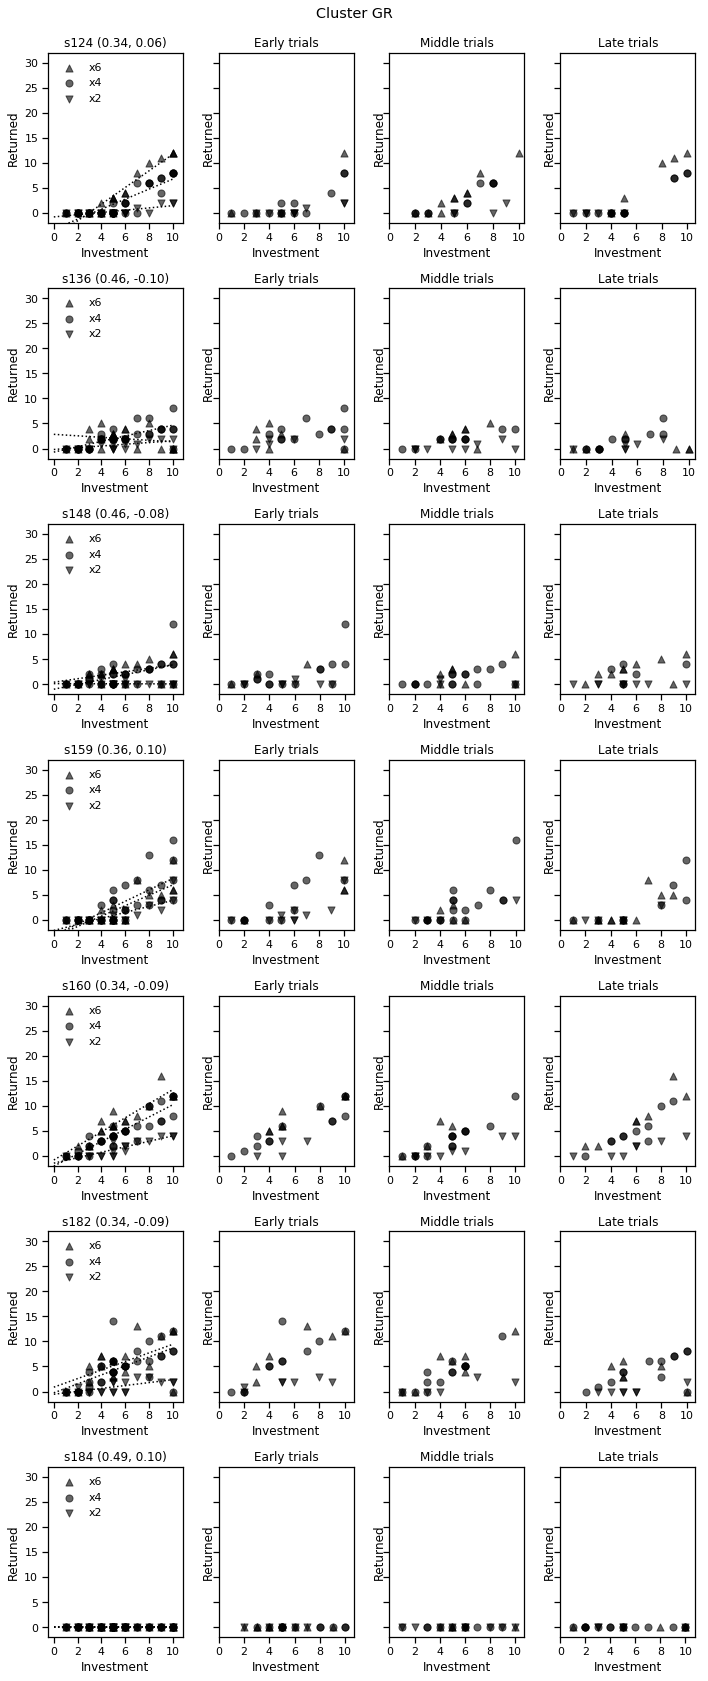

Cluster GA: subjects [142 146 154 158 186]


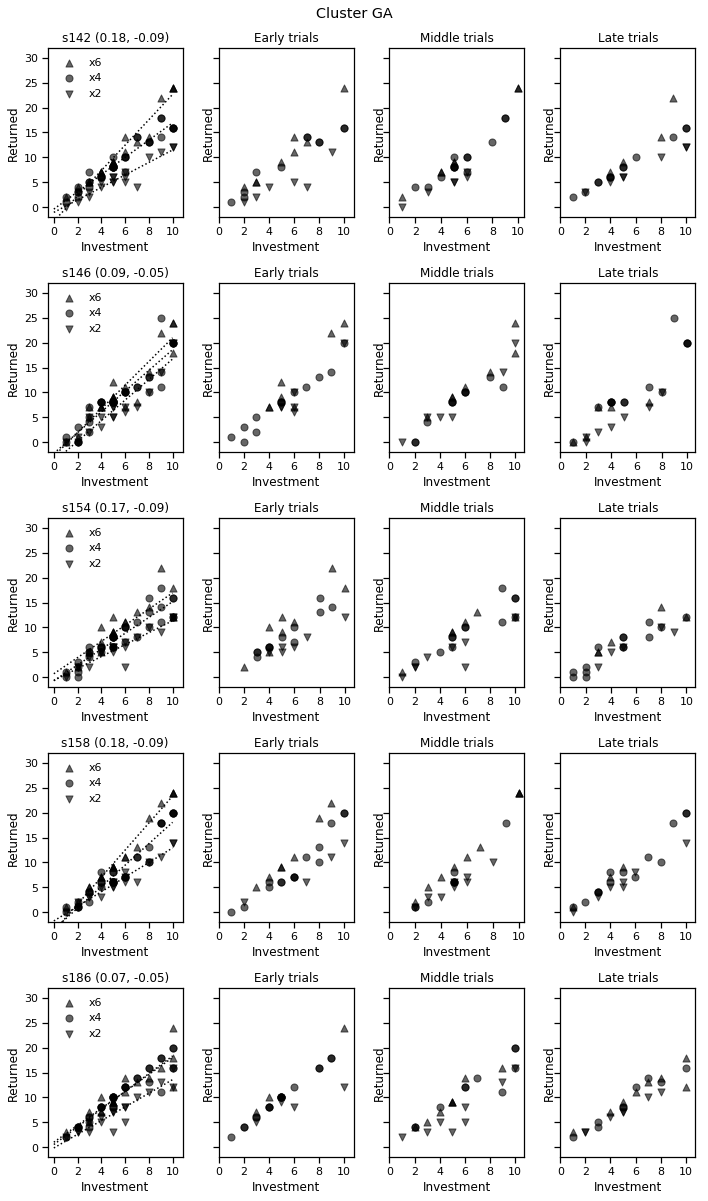

Cluster IA: subjects [128 132 133 138 140 141 143 144 145 150 151 152 153 157 165 172 175 178
 179 181 183 190 191 192]


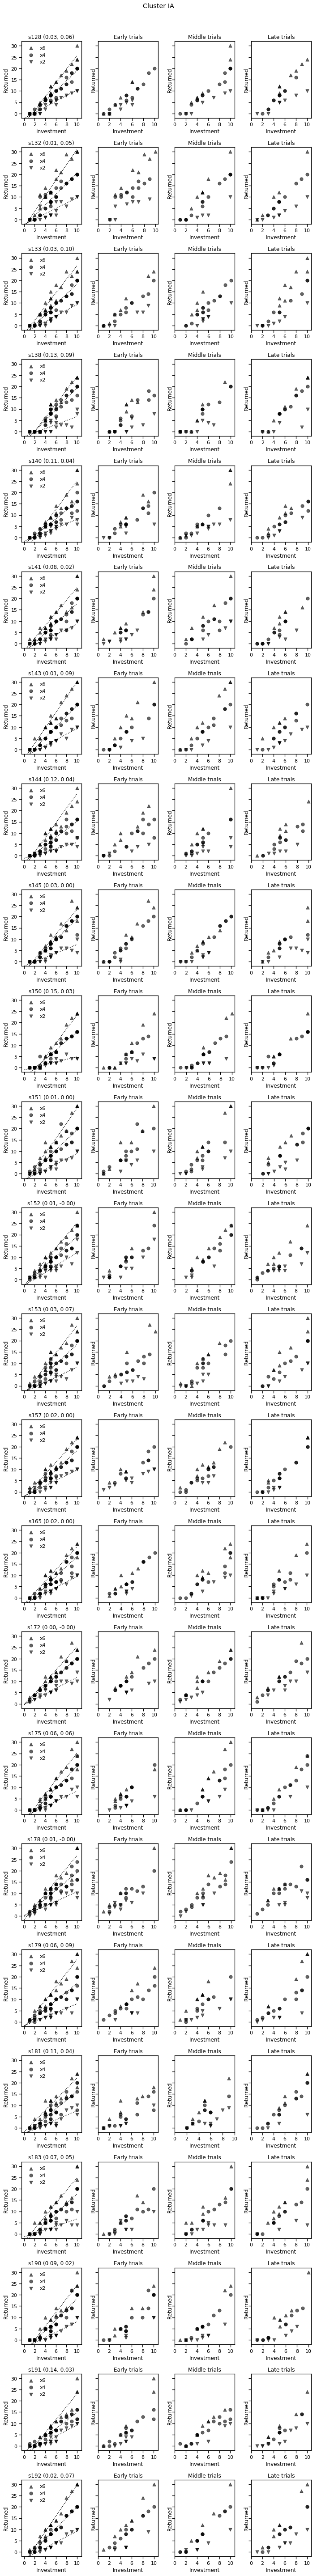

Cluster MO: subjects [126 129 130 131 134 135 137 139 156 161 162 164 171 173 174 176 177 180
 185 187 189]


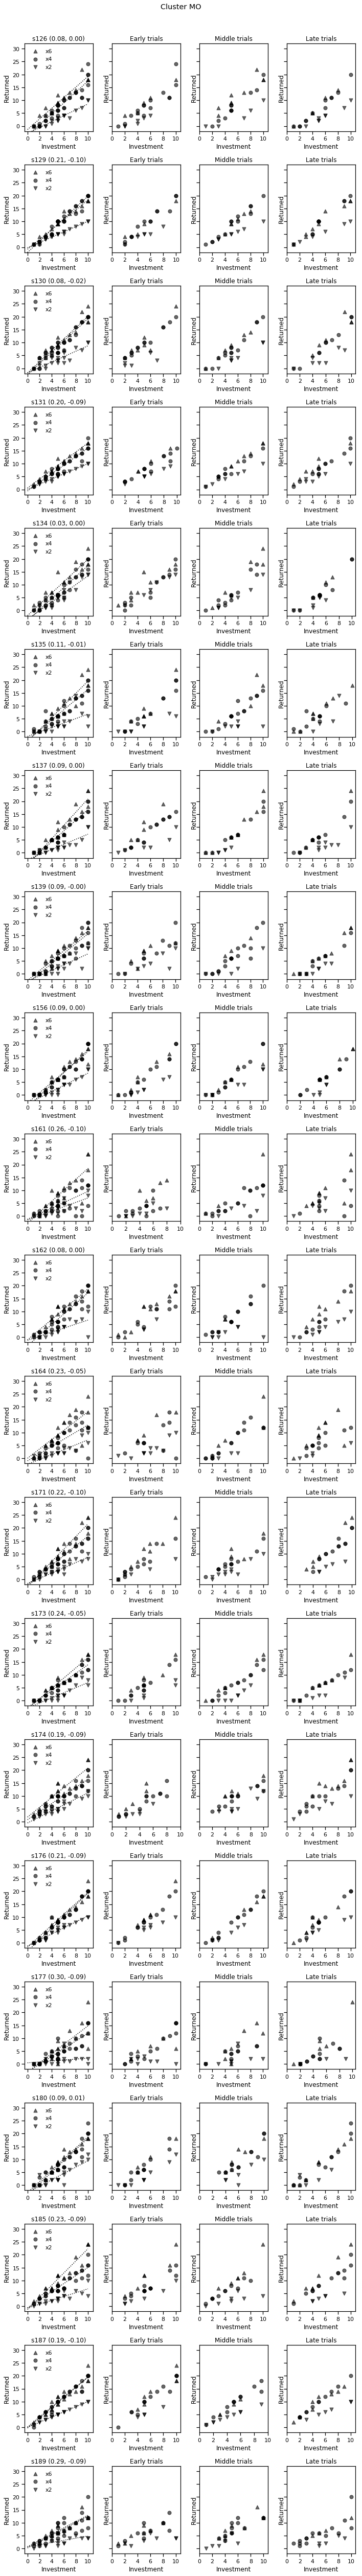

In [14]:
allDataLong = pd.read_csv(os.path.join(base_dir,'Data/1.TaskBehavior/allDataLong.csv'),header=None,index_col=None)
allDataLong.columns=['sub','Investment','Multiplier','Returned','exp','fair','soc1','soc2']
phases = ['Early','Middle','Late']
nphases = 3
ncols = 4
sns.set_context('notebook')
markers = {2: "v", 4: 'd', 6:'^'}

for clustName in ['GR','GA','IA','MO']:
    clustSubs = np.array(fittedParams.loc[fittedParams['ClustName']==clustName,'sub'])
    print 'Cluster %s: subjects %s'%(clustName,clustSubs)
    nrows = len(clustSubs)
    fig,ax = plt.subplots(nrows,ncols,figsize=[ncols*2.5,nrows*3.3],sharey=True)
    for subInd,sub in enumerate(clustSubs):
        row = subInd
        subDat = allDataLong.loc[allDataLong['sub']==sub,:].copy().reset_index(drop=True)
        phaseVec = pd.DataFrame(np.zeros([subDat.shape[0],1]))
        for chunkInd,rowChunk in enumerate(np.array_split(subDat.index,3)):
            phaseVec.iloc[rowChunk] = chunkInd
        subDat['phase'] = phaseVec
        subDat.phase = subDat.phase.replace(to_replace=[0,1,2],value=phases)
        subDat = subDat.loc[subDat['Investment']>0,:].reset_index(drop=True)
        theta = fittedParams.loc[fittedParams['sub']==sub,'theta']
        phi = fittedParams.loc[fittedParams['sub']==sub,'phi']
        plot_sub_ax(subDat,sub,theta,phi,ax[row,0])
        for phaseInd, phase in enumerate(phases):
            axCur = ax[row,phaseInd+1]
            axDat = data=subDat.loc[subDat['phase']==phase,:]
            plot_sub_ax(axDat,sub,theta,phi,axCur,plotLines=False)
            axCur.set_title('%s trials'%phase)
            axCur.legend_.remove()
    plt.ylim([-2,32])
    plt.tight_layout()
    plt.suptitle('Cluster %s'%clustName,y=1.01)
    plt.savefig(os.path.join(base_dir,'Results/2.ClusterModel/ClusterBehavior/Cluster-%s_phases.png' %(
        clustName)),format='png',dpi=200,bbox_inches='tight')
    plt.show()